**Features:**

**age:** Continuous

**workclass:** Categorical (e.g., Private, Self-emp-not-inc, Local-gov)

**education:** Categorical (e.g., Bachelors, HS-grad, Some-college)

**marital-status:** Categorical (e.g., Married-civ-spouse, Never-married)

**occupation:** Categorical (e.g., Tech-support, Sales, Exec-managerial)

**relationship:** Categorical (e.g., Wife, Own-child, Husband)

**race:** Categorical (e.g., White, Black)

**sex:** Categorical (e.g., Female, Male)

**capital-gain:** Continuous

**capital-loss:** Continuous

**hours-per-week:** Continuous

**native-country:** Categorical (e.g., United-States, Mexico)

<br>

**Target Variable:**

**income:** Categorical (>50K, <=50K)

In [3]:
# Requirements: pandas, matplotlib, imblearn, sklearn, numpy, seaborn, scipy

##Load Data and Data Understanding

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
adult_train = pd.read_csv('../data/Adult_Income/adult.data', header=None, skiprows=1)
adult_test = pd.read_csv('../data/Adult_Income/adult.test', header=None, skiprows=1) 

df = pd.concat([adult_train, adult_test])

columns_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship',
                 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
                 ]


df = df.rename(columns=dict(zip(df.columns, columns_names)))
print(df.dtypes)
df['income'] = df['income'].str.replace('.', '')

df

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


##Exploratory Data Analysis

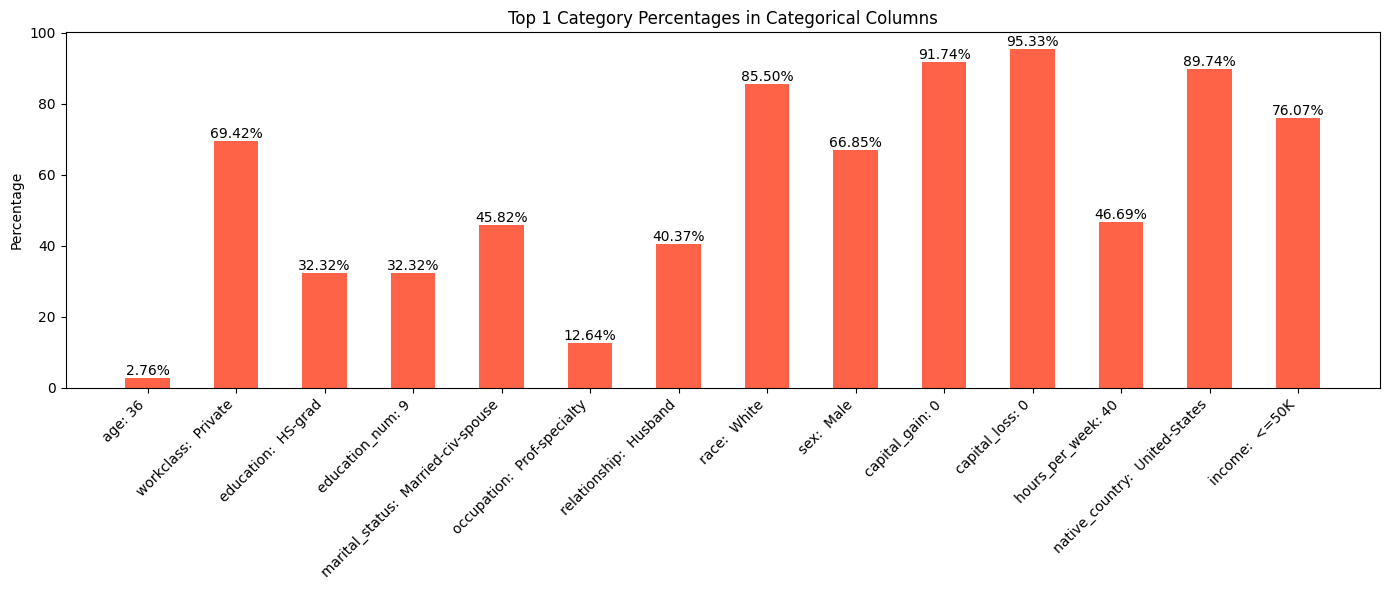

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# List of categorical columns
categorical_columns = columns_names

# Create a figure and axis for the single plot
fig, ax = plt.subplots(figsize=(14, 6))

# Function to create a single plot with top 1 category percentages
def top1_bar_plot():
    top1_categories = []
    category_percentages = []
    
    for column in categorical_columns:
        if column != 'fnlwgt':
            most_common = df[column].mode().values[0]
            total_count = len(df[column])
            most_common_count = df[column].value_counts()[most_common]
            percentage = (most_common_count / total_count) * 100
            top1_categories.append(f"{column}: {most_common}")
            category_percentages.append(percentage)
    
    x = np.arange(len(top1_categories))
    width = 0.5
    
    ax.bar(x, category_percentages, width, color='tomato')
    ax.set_title('Top 1 Category Percentages in Categorical Columns')
    ax.set_xticks(x)
    ax.set_xticklabels(top1_categories, rotation=45, ha='right')
    ax.set_ylabel('Percentage')
    
    for i, percentage in enumerate(category_percentages):
        ax.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
    
top1_bar_plot()

plt.tight_layout()
plt.show()


0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
16276     <=50K
16277     <=50K
16278     <=50K
16279     <=50K
16280      >50K
Name: income, Length: 48841, dtype: object


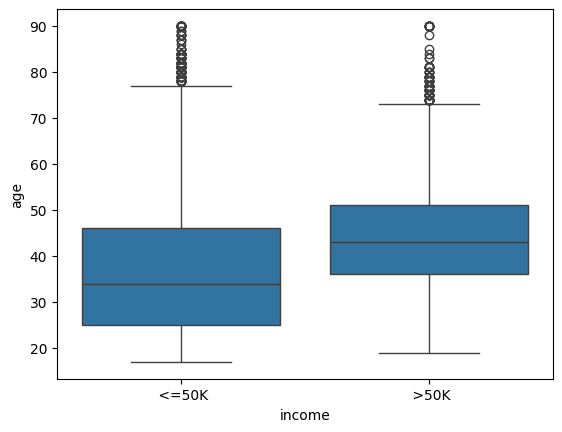

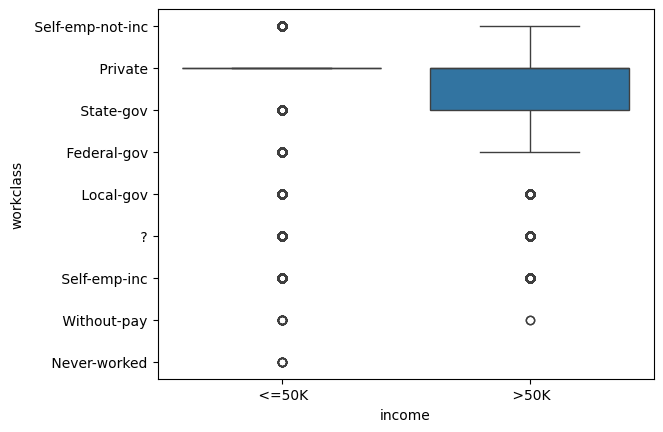

In [ ]:
continuous_vars = ['age','workclass']
for var in continuous_vars:
    plt.figure()
    sns.boxplot(x='income', y=var, data=df)
    
print(df['income'])

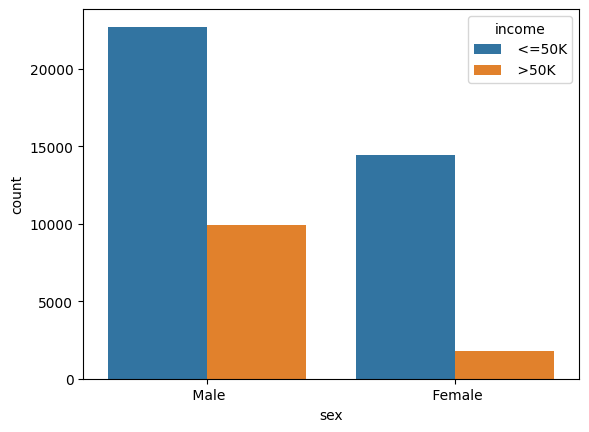

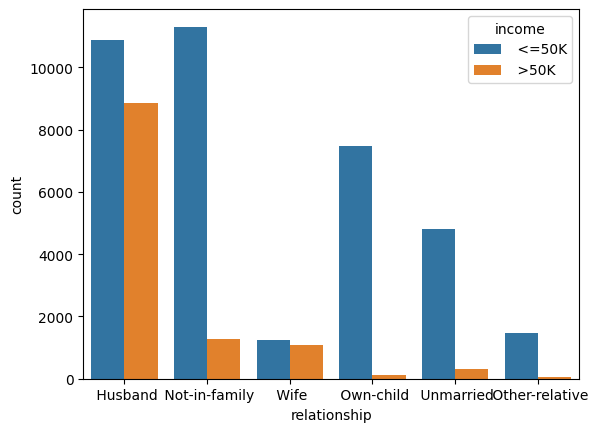

In [ ]:
categorical_vars = ['sex', 'relationship']
for var in categorical_vars:
    plt.figure()
    sns.countplot(x=var, hue='income', data=df)

##Data Preprocessing

In [ ]:
#Replace ? values with NaN
df.replace('?', np.nan, inplace=True)
missing_values = df.isnull().sum()
a = missing_values[missing_values > 0]
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


## Feature Engineering

## Encoding Categorical Variables

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    unique_occurrences = df[column].value_counts()
    if unique_occurrences.count() < 3:
        print(f"Column '{column}' has {unique_occurrences.count()} unique occurrences:")
        print(unique_occurrences)

Column 'sex' has 2 unique occurrences:
sex
 Male      32649
 Female    16192
Name: count, dtype: int64
Column 'income' has 2 unique occurrences:
income
 <=50K    37154
 >50K     11687
Name: count, dtype: int64


In [ ]:
df['sex'].replace({' Male': 0, ' Female': 1}, inplace=True)
df['income'].replace({' >50K': 0, ' <=50K': 1}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,1


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    unique_occurrences = df[column].value_counts()
    if unique_occurrences.count() > 3:
        print(f"Column '{column}' has {unique_occurrences.count()} unique occurrences:")
        print(unique_occurrences)

Column 'workclass' has 9 unique occurrences:
workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64
Column 'education' has 16 unique occurrences:
education
 HS-grad         15784
 Some-college    10878
 Bachelors        8024
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: count, dtype: int64
Column 'marital_status' has 7 unique occurrences:
marital_status
 Married-civ-spouse       22379
 Never-married            16116
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 

In [ ]:
# Not for Binary Columns
columns_to_remove = ['income', 'sex', 'age']

columns_to_encode = [column for column in df.columns if column not in columns_to_remove]

label_encoder = LabelEncoder()

# Using Integers Number instead of Strings
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,3787,9,12,2,4,0,4,0,0,0,12,39,1
1,38,4,18341,11,8,0,6,1,4,0,0,0,39,39,1
2,53,4,19994,1,6,2,6,0,2,0,0,0,39,39,1
3,28,4,25404,9,12,2,10,5,2,1,0,0,39,5,1
4,37,4,23148,12,13,2,4,5,4,1,0,0,39,39,1


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = df.drop('income', axis=1)
target = df['income']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=50, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.7875934077182926
[[ 748 1557]
 [ 518 6946]]
              precision    recall  f1-score   support

           0       0.59      0.32      0.42      2305
           1       0.82      0.93      0.87      7464

    accuracy                           0.79      9769
   macro avg       0.70      0.63      0.64      9769
weighted avg       0.76      0.79      0.76      9769



c:\Users\maxru\OneDrive\Desktop\Adult_Income_Analysis_ML\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Further Investigation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

feature_importances_rf = random_forest_model.feature_importances_

feature_importance_rf_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances_rf
})
 
# Sort the DataFrame by the importances
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

feature_importance_rf_df

,Feature,Importance
2,fnlwgt,0.173322
0,age,0.151562
10,capital_gain,0.115831
7,relationship,0.100983
4,education_num,0.089713
12,hours_per_week,0.082693
5,marital_status,0.067838
6,occupation,0.064804
1,workclass,0.038892
11,capital_loss,0.036021


In [ ]:
from sklearn.utils import shuffle

# Separate the two classes
df_survived = df[df['income'] == 1]
df_not_survived = df[df['income'] == 0]

# Create an imbalanced dataset by taking a small subset of the 'Survived' class
df_survived_imbalanced = df_survived.sample(frac=0.1, random_state=42)
df_not_survived_imbalanced = df_not_survived

# Combine to form the imbalanced dataset
df_imbalanced = pd.concat([df_survived_imbalanced, df_not_survived_imbalanced])

# Shuffle the dataset
df_imbalanced = shuffle(df_imbalanced, random_state=42)

# Check the imbalance in the dataset
imbalance_distribution = df_imbalanced['income'].value_counts(normalize=True) * 100
imbalance_distribution

income
0    75.879756
1    24.120244
Name: proportion, dtype: float64

In [ ]:
# Selecting features and target variable
features = df_imbalanced.drop(['income'], axis=1)
target = df_imbalanced['income']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

random_forest_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = random_forest_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
print(accuracy)
print(conf_matrix)

0.8695228821811101
[[2209  139]
 [ 263  470]]


2209 True Negatives (correctly predicted >=50K)

470 True Positives (correctly predicted <=50K)

139 False Positives (incorrectly predicted <=50K)

263 False Negatives (incorrectly predicted >=50K)